In [1]:
import pandas as pd
import tensorflow as tf

In [2]:
print("version",tf.__version__)

version 2.1.0


In [49]:
train=pd.read_csv('CIC_AE_train.csv')
test=pd.read_csv('CIC_AE_test.csv')

# train = pd.read_csv('./CIC_RF_train.csv')
# test = pd.read_csv('./CIC_RF_test.csv')

In [50]:
train_X=train.iloc[:,:-1]
train_Y=train.iloc[:,-1]
test_X=test.iloc[:,:-1]
test_Y=test.iloc[:,-1]

In [51]:
train_X.shape

(263809, 34)

In [52]:
test_Y

0         1.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
427592    1.0
427593    1.0
427594    1.0
427595    1.0
427596    0.0
Name:  Label, Length: 427597, dtype: float64

In [53]:
import sys
import numpy as np

In [54]:
#layers params#
n_inputs = train_X.shape[1]
n_hidden1 = 300 #인코더
n_hidden2 = 150 #coding units
n_hidden3 = n_hidden1 #디코더
n_outputs = n_inputs # reconstruction
print(n_inputs, n_outputs)

34 34


In [55]:
#train params#
learning_rate = 0.01 
l2_reg = 0.0005
learning_rate = 0.01
n_epochs = 100
batch_size = 32
n_batches = len(train_X)

In [56]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers
import os
import numpy as np 
import tensorflow as tf 
from functools import partial
import tensorflow.compat.v1 as tf
# set the layers using partial
activation = tf.nn.elu
weight_initializer = tf.keras.initializers.he_normal()  # He 초기화
# weight_initializer = tf.keras.initializers.glorot_uniform()
l2_regularizer = tf.keras.regularizers.l2(l2_reg)  # L2 규제


In [57]:
print("version",tf.__version__)

version 2.1.0


In [58]:
encoding_dim=300

input_layer = Input(shape=(n_inputs, ))
encoder = Dense(encoding_dim, activation=tf.nn.relu, kernel_regularizer=l2_regularizer, kernel_initializer=weight_initializer)(input_layer)
coding = Dense(int(encoding_dim/2), activation=tf.nn.relu, kernel_regularizer=l2_regularizer, kernel_initializer=weight_initializer)(encoder)
decoder = Dense(encoding_dim, activation=tf.nn.relu, kernel_regularizer=l2_regularizer, kernel_initializer=weight_initializer)(coding)
output_layer = Dense(34, activation=tf.nn.relu, kernel_regularizer=l2_regularizer, kernel_initializer=weight_initializer)(decoder)
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# input_layer = Input(shape=(n_inputs, ))
# encoder = Dense(encoding_dim, activation=tf.nn.relu, kernel_regularizer=l2_regularizer, kernel_initializer=weight_initializer)(input_layer)
# coding = Dense(int(encoding_dim/2), activation=tf.nn.relu, kernel_regularizer=l2_regularizer, kernel_initializer=weight_initializer)(encoder)
# decoder = Dense(encoding_dim, activation=tf.nn.relu, kernel_regularizer=l2_regularizer, kernel_initializer=weight_initializer)(coding)
# output_layer = Dense(34, activation=tf.nn.relu, kernel_regularizer=l2_regularizer, kernel_initializer=weight_initializer)(decoder)
# autoencoder = Model(inputs=input_layer, outputs=output_layer)

# input_layer = Input(shape=(n_inputs, ))
# dense1 = Dense(encoding_dim, activation=tf.nn.relu, kernel_regularizer=l2_regularizer, kernel_initializer=weight_initializer)(input_layer)
# dense2 = Dense(int(encoding_dim/2), activation=tf.nn.relu, kernel_regularizer=l2_regularizer, kernel_initializer=weight_initializer)(dense1)
# dense3 = Dense(4, activation=tf.nn.relu, kernel_regularizer=l2_regularizer, kernel_initializer=weight_initializer)(dense2)
# dense4 = Dense(int(encoding_dim/2), activation=tf.nn.relu, kernel_regularizer=l2_regularizer, kernel_initializer=weight_initializer)(dense3)
# dense5 = Dense(encoding_dim,activation=tf.nn.relu, kernel_regularizer=l2_regularizer, kernel_initializer=weight_initializer)(dense4)
# output_layer = Dense(34, activation=tf.nn.sigmoid, kernel_regularizer=l2_regularizer, kernel_initializer=weight_initializer)(dense5)
# autoencoder = Model(inputs=input_layer, outputs=output_layer)

# encoder = Dense(encoding_dim, activation=tf.nn.relu, kernel_initializer=weight_initializer)(input_layer)
# coding = Dense(int(encoding_dim/2), activation=tf.nn.relu, kernel_initializer=weight_initializer)(encoder)
# decoder = Dense(int(encoding_dim), activation=tf.nn.relu, kernel_initializer=weight_initializer)(coding)
# output_layer = Dense(34, activation=tf.nn.relu, kernel_initializer=weight_initializer)(decoder)
# autoencoder = Model(inputs=input_layer, outputs=output_layer)

In [59]:
nb_epoch =100
batch_size =32

autoencoder.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
# autoencoder.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# checkpointer = ModelCheckpoint(filepath="model2.h5",
#                               verbose=0,
#                               save_best_only=True)
history = autoencoder.fit(train_X,train_X,
                         epochs=nb_epoch,
                         batch_size=batch_size,
                         shuffle=True,
                         validation_data=(test_X,test_X),
                         verbose=1
                         #callbacks=[checkpointer]
                         ).history

Train on 263809 samples, validate on 427597 samples
Epoch 1/100
263809/263809 [==============================] - 22s 84us/sample - loss: 0.0150 - accuracy: 0.9101 - val_loss: 0.0215 - val_accuracy: 0.8467
Epoch 2/100
263809/263809 [==============================] - 22s 84us/sample - loss: 0.0058 - accuracy: 0.9124 - val_loss: 0.0217 - val_accuracy: 0.8472
Epoch 3/100
263809/263809 [==============================] - 22s 82us/sample - loss: 0.0058 - accuracy: 0.9128 - val_loss: 0.0219 - val_accuracy: 0.8472
Epoch 4/100
263809/263809 [==============================] - 22s 83us/sample - loss: 0.0058 - accuracy: 0.9134 - val_loss: 0.0219 - val_accuracy: 0.8463
Epoch 5/100
263809/263809 [==============================] - 21s 81us/sample - loss: 0.0058 - accuracy: 0.9133 - val_loss: 0.0220 - val_accuracy: 0.8472
Epoch 6/100
263809/263809 [==============================] - 22s 82us/sample - loss: 0.0058 - accuracy: 0.9133 - val_loss: 0.0214 - val_accuracy: 0.8307
Epoch 7/100
263809/263809 [===

Epoch 54/100
263809/263809 [==============================] - 21s 80us/sample - loss: 0.0058 - accuracy: 0.9135 - val_loss: 0.0214 - val_accuracy: 0.8463
Epoch 55/100
263809/263809 [==============================] - 21s 81us/sample - loss: 0.0058 - accuracy: 0.9135 - val_loss: 0.0217 - val_accuracy: 0.8472
Epoch 56/100
263809/263809 [==============================] - 22s 82us/sample - loss: 0.0058 - accuracy: 0.9135 - val_loss: 0.0229 - val_accuracy: 0.8472
Epoch 57/100
263809/263809 [==============================] - 21s 79us/sample - loss: 0.0058 - accuracy: 0.9136 - val_loss: 0.0232 - val_accuracy: 0.8472
Epoch 58/100
263809/263809 [==============================] - 22s 82us/sample - loss: 0.0058 - accuracy: 0.9136 - val_loss: 0.0219 - val_accuracy: 0.8472
Epoch 59/100
263809/263809 [==============================] - 22s 83us/sample - loss: 0.0058 - accuracy: 0.9136 - val_loss: 0.0216 - val_accuracy: 0.8472
Epoch 60/100
263809/263809 [==============================] - 22s 82us/sampl

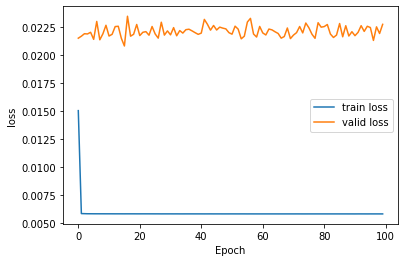

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

plt.plot(history['loss'], label='train loss')
plt.plot(history['val_loss'], label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show()

In [61]:
import numpy as np
from sklearn import metrics

predictions = autoencoder.predict(test_X)
#result = autoencoder.predict_classes(test_X)
mse = np.mean(np.power(test_X - predictions,2),axis=1)
error_df = pd.DataFrame({'reconstruction_error':mse, 'true_class':test_Y})

precision_rt, recall_rt, threshold_rt = metrics.precision_recall_curve(error_df['true_class'], error_df['reconstruction_error'])

In [62]:
predictions

array([[0.63424444, 0.        , 0.05340928, ..., 0.46477205, 0.47997108,
        0.45139706],
       [0.0105748 , 0.        , 0.00520232, ..., 0.        , 0.        ,
        0.        ],
       [0.00286921, 0.        , 0.00487583, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.67257696, 0.        , 0.05903116, ..., 0.5227443 , 0.5395248 ,
        0.5083503 ],
       [0.6892371 , 0.        , 0.06029322, ..., 0.5349338 , 0.55209213,
        0.5202085 ],
       [0.00537728, 0.        , 0.00496128, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [70]:
res = metrics.classification_report(test_Y,y_pred)
print(res)

              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75    175874
         1.0       0.78      1.00      0.88    251723

    accuracy                           0.83    427597
   macro avg       0.89      0.80      0.81    427597
weighted avg       0.87      0.83      0.82    427597



C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


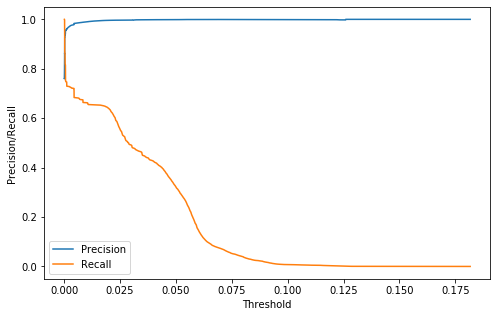

In [64]:
plt.figure(figsize=(8,5))
plt.plot(threshold_rt, precision_rt[1:], label='Precision')
plt.plot(threshold_rt, recall_rt[1:], label='Recall')
plt.xlabel('Threshold'); plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [65]:
# best position of threshold
index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
print('precision: ',precision_rt[index_cnt],', recall: ',recall_rt[index_cnt])

# fixed Threshold
threshold_fixed = threshold_rt[index_cnt]
# threshold_fixed = 4.526054e-07 
print('threshold: ',threshold_fixed)

IndexError: list index out of range

In [66]:
error_df.describe()

,reconstruction_error,true_class
count,427597.000000,427597.000000
mean,0.019093,0.588692
std,0.026104,0.492071
min,0.000046,0.000000
25%,0.000189,0.000000
50%,0.000616,1.000000
75%,0.040221,1.000000
max,0.181646,1.000000


C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


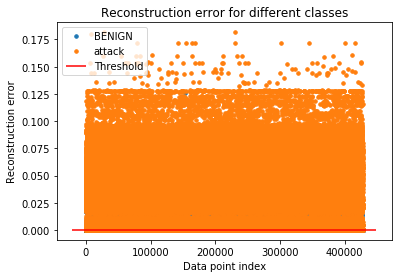

0.00016079723997321584


In [67]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "attack" if name ==1 else "BENIGN")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()
print(threshold_fixed)

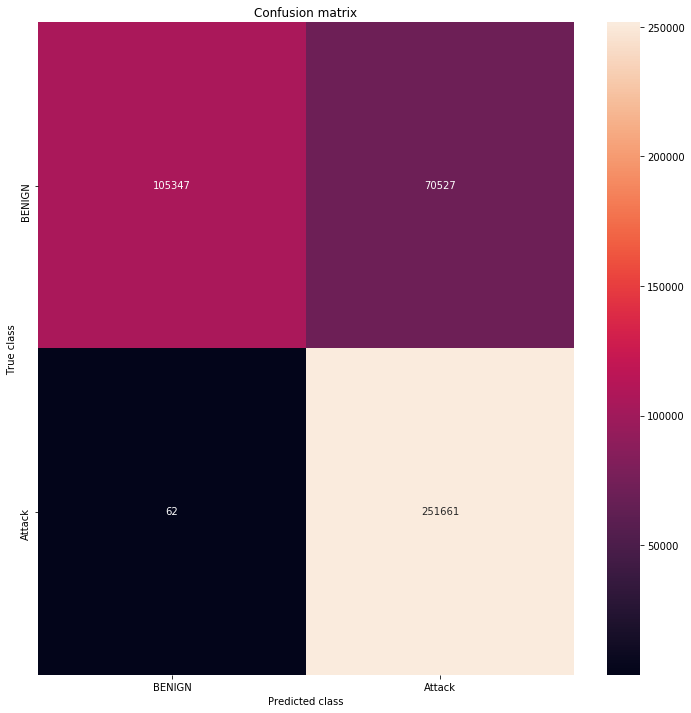

In [68]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
#threshold = 0.0001
LABELS=["BENIGN","Attack"]
y_pred = [1 if e > threshold_fixed else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [69]:
from tensorflow.keras.models import load_model

In [88]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from sklearn import metrics
import pandas as pd
import numpy as np

class AutoEncoder():
    #data = ""
    #temp = ""
    
    def __init__(self, test_data_path):
        self.data=pd.read_csv(test_data_path) 
        self.temp=pd.read_csv(test_data_path)

    def preprocess(self):
        data1=self.data[[' Flow Duration', 'Total Length of Fwd Packets',
        ' Fwd Packet Length Max', ' Fwd Packet Length Min',
        ' Fwd Packet Length Mean',' Fwd Packet Length Std',
        'Bwd Packet Length Max',' Bwd Packet Length Mean',
        ' Bwd Packet Length Std',' Flow Packets/s',' Flow IAT Mean',
        ' Flow IAT Std',' Flow IAT Max','Fwd IAT Total',' Fwd IAT Mean',
        ' Fwd IAT Std',' Fwd IAT Max','Bwd IAT Total',' Bwd IAT Mean',
        ' Bwd IAT Std',' Bwd IAT Max',' Max Packet Length',
        ' Packet Length Mean',' Packet Length Std',' Packet Length Variance',
        ' Down/Up Ratio',' Average Packet Size',' Avg Fwd Segment Size',
        ' Avg Bwd Segment Size',' Subflow Fwd Bytes',' act_data_pkt_fwd',
        'Idle Mean',' Idle Max',' Idle Min']]
        data2 = self.temp
        data2 = data2.dropna(axis=0)
        data1 = data1.dropna(axis=0)
    
        a = data2[' Flow Packets/s']=='Infinity'
        b = data1[' Flow Packets/s']=='Infinity'
        #data1 = data1[~a]
        data1 = data1[~b]
        self.temp = data2[~a]

        #data_norm = (data1-data1.min())/(data1.max()-data1.min())
        return data1

    def load(self):
        input_data = self.preprocess()
        min_max_scaler = MinMaxScaler()
        norm_data = min_max_scaler.fit_transform(input_data)
        norm_data = pd.DataFrame(norm_data,columns=data1.columns,index=list(data1.index.values))
        
        threshold = 0.0002768409243105919
        model = load_model('./model.h5')
        predictions = model.predict(norm_data)
        mse = np.mean(np.power(norm_data-predictions,2),axis=1)
        error_df = pd.DataFrame({'Reconstruction_error':mse})
        pred_y = [1 if e>threshold else 0 for e in error_df['Reconstruction_error'].values]
        
        return pred_y
    
    def get_result(self):
        result = self.load()
        result_data = self.temp
        result_data['Label'] = result
        return result_data


In [84]:
data = AutoEncoder('./data/Wednesday-workingHours.pcap_ISCX.csv')
data.get_result()

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,1
3,389,15206,17,12,3452,6660,1313,0,203.058824,425.778474,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,1
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
692699,53,324,2,2,84,362,42,42,42.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
692700,58030,82,2,1,31,6,31,0,15.500000,21.920310,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
692701,53,1048635,6,2,192,256,32,32,32.000000,0.000000,...,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


In [59]:
data1

,Flow Duration,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Packets/s,...,Packet Length Variance,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,act_data_pkt_fwd,Idle Mean,Idle Max,Idle Min
0,38308,6,6,6,6.000000,0.000000,6,6.000000,0.000000,52.208416,...,0.000000,1,9.000000,6.000000,6.000000,6,0,0.0,0,0
1,479,172,79,0,15.636364,31.449238,163,65.200000,89.278777,33402.92276,...,3195.595588,0,31.125000,15.636364,65.200000,172,4,0.0,0,0
2,1095,3150,1575,0,315.000000,632.561635,1575,525.000000,813.326503,14611.87215,...,451250.132400,0,393.750000,315.000000,525.000000,3150,3,0.0,0,0
3,15206,3452,1313,0,203.058824,425.778474,3069,555.000000,977.480342,1907.141918,...,496537.374700,0,348.689655,203.058824,555.000000,3452,10,0.0,0,0
4,1092,3150,1575,0,350.000000,694.509719,1576,525.333333,813.842901,13736.26374,...,496440.116700,0,420.133333,350.000000,525.333333,3150,2,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,32215,112,28,28,28.000000,0.000000,76,76.000000,0.000000,186.249,...,548.571429,0,48.666667,28.000000,76.000000,112,3,0.0,0,0
692699,324,84,42,42,42.000000,0.000000,181,181.000000,0.000000,12345.7,...,5796.300000,1,122.000000,42.000000,181.000000,84,1,0.0,0,0
692700,82,31,31,0,15.500000,21.920310,6,6.000000,0.000000,36585.4,...,267.333333,0,22.666667,15.500000,6.000000,31,0,0.0,0,0
692701,1048635,192,32,32,32.000000,0.000000,128,128.000000,0.000000,7.62897,...,1792.000000,0,60.000000,32.000000,128.000000,192,5,0.0,0,0


In [62]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(data1)
output = min_max_scaler.transform(data1)
output = pd.DataFrame(output,columns=data1.columns,index=list(data1.index.values))
output.head()

,Flow Duration,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Packets/s,...,Packet Length Variance,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,act_data_pkt_fwd,Idle Mean,Idle Max,Idle Min
0,0.000319,0.000005,0.000242,0.002906,0.001293,0.000000,0.000307,0.001373,0.000000,0.400010,...,0.000000,0.023256,0.003446,0.001293,0.001373,0.000005,0.000000,0.0,0.0,0.0
1,0.000004,0.000141,0.003183,0.000000,0.003369,0.004892,0.008346,0.014918,0.013294,0.406681,...,0.000168,0.000000,0.011916,0.003369,0.014918,0.000141,0.000020,0.0,0.0,0.0
2,0.000009,0.002573,0.063457,0.000000,0.067877,0.098389,0.080645,0.120118,0.121108,0.402922,...,0.023750,0.000000,0.150747,0.067877,0.120118,0.002573,0.000015,0.0,0.0,0.0
3,0.000127,0.002820,0.052901,0.000000,0.043756,0.066226,0.157143,0.126982,0.145551,0.400381,...,0.026134,0.000000,0.133495,0.043756,0.126982,0.002820,0.000051,0.0,0.0,0.0
4,0.000009,0.002573,0.063457,0.000000,0.075419,0.108024,0.080696,0.120195,0.121184,0.402747,...,0.026128,0.000000,0.160847,0.075419,0.120195,0.002573,0.000010,0.0,0.0,0.0
